In [2]:
import torch 
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt
import h5py 
import sys
models_path = "C:\\Users\\noedi\\Desktop\\Stage été 2022\\Code stage\\Vae Galaxies"
sys.path.append(models_path)

In [3]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

# View some galaxies

In [4]:
path_denoised_galaxies = 'C:\\Users\\noedi\\Desktop\\Stage été 2022\\Code stage\\Vae Galaxies\\Data\\cosmos.h5'
path_galaxy_w_redshift = 'C:\\Users\\noedi\\Desktop\\Stage été 2022\\Code stage\\Vae Galaxies\\Data\\cosmos_25.2_all_with_zphot.h5'

In [5]:
class dataset(torch.utils.data.Dataset):
    def __init__(self, file):
        self.file = file
        self.hdf = h5py.File(file, 'r')
        
    def __len__(self):
        self.hdf.keys()
        return len(self.hdf["images"])

    def __getitem__(self, idx):
        with h5py.File(self.file, "r") as hf:
            # read a single example
            x = hf["images"][idx]
            z = hf["zphot"][idx]
        return x, z


In [6]:
galaxy_w_redshift_dataset = dataset(path_galaxy_w_redshift)

In [7]:
batchsize = 64
galaxy_loader = DataLoader(galaxy_w_redshift_dataset, batch_size = batchsize, shuffle = True)

# Training Time

In [7]:
from CVAE_4_correct import VariationalAutoencoder

In [8]:
# Network parameters 
nc, nf, z_dim = 2, 64, 32
vae = VariationalAutoencoder(nc, nf, z_dim).to(device)

# Training parameters
num_epochs = 1
lr = 1e-3
beta = 0.1 # Disentangled vae 
train_loss, mse, kl = vae.train_time(galaxy_loader, epochs = num_epochs, learning_rate = lr, beta = 0.1)

  0%|          | 0/1 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Training for 1 epochs, with z_{dim}=32$\\beta=$0.1 and lr = 0.001')

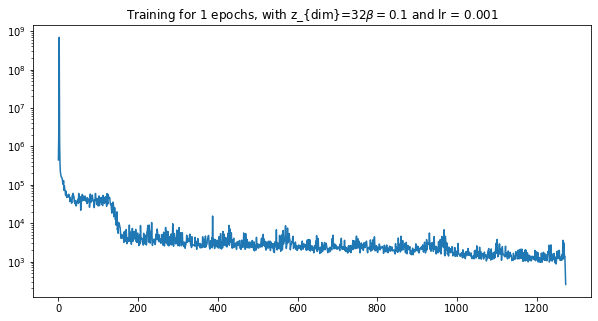

In [9]:
plt.figure(figsize=(10,5))
plt.plot(train_loss, label = 'Training loss')
plt.yscale('log')
plt.title(f'Training for {num_epochs} epochs, with '+r'z_{dim}='+f'{z_dim}'+r'$\beta=$'+f'{beta} and lr = {lr}')